In [1]:
# For Susan

In [1]:
# imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib widget


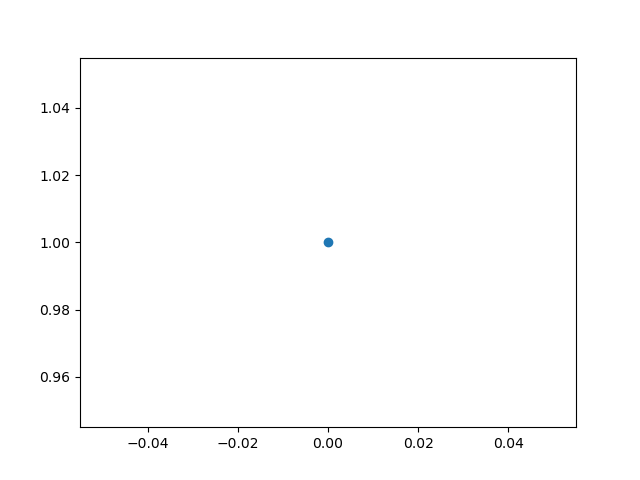

In [2]:
plt.figure()
plt.scatter(0,1)

In [17]:
# read in data
path = '/Users/austin/Desktop/Susan/Sample001/'
files = os.listdir(path)

print(files)

['puck_1_fiber_positions.png', 'scales.npz', 'puck_1_final_crops', '.DS_Store', 'puck_1_raw_image.npz', 'puck_1_raw_image.png.npz', 'puck_1_fiber_data.csv']


In [18]:
# we want to read the positions from this one:
'puck_1_fiber_data.csv'

# Pandas calls their structure a "DataFrame" or df for short
df = pd.read_csv(path + 'puck_1_fiber_data.csv')

In [19]:
# this function tells you everything about the df object
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data 

In [20]:
# now we see what's in it:
df

,Spot ID,Diameter (um),Height (um),Position (um)
0,1,9.844206,105.344720,[192.75368 874.27562]
1,2,12.873192,103.253063,[205.144988 658.116136]
2,3,12.115946,108.381255,[ 276.739212 1237.753988]
3,4,12.873192,108.670415,[ 329.058068 1082.174232]
4,5,9.844206,106.716877,[371.73924 882.536492]
5,6,12.115946,103.465153,[565.869732 404.782728]
6,7,12.115946,103.436595,[641.594392 382.753736]
7,8,9.844206,110.102811,[ 681.52194 1236.377176]
8,9,12.115946,111.162198,[ 794.420524 1346.522136]
9,10,12.873192,105.405082,[801.304584 546.594364]


In [21]:
# we want the positions:
df['Position (um)']

0         [192.75368 874.27562]
1       [205.144988 658.116136]
2     [ 276.739212 1237.753988]
3     [ 329.058068 1082.174232]
4       [371.73924  882.536492]
5       [565.869732 404.782728]
6       [641.594392 382.753736]
7     [ 681.52194  1236.377176]
8     [ 794.420524 1346.522136]
9       [801.304584 546.594364]
10      [845.362568 377.246488]
11    [1086.304668 1448.406224]
12    [1358.913444  633.33352 ]
13    [1401.594616  671.884256]
14    [1444.275788  874.27562 ]
Name: Position (um), dtype: object

In [22]:
# I'm going to get them as a numpy array because I'm most familiar with those
positions = np.array(df['Position (um)'])
positions

array(['[192.75368 874.27562]', '[205.144988 658.116136]',
       '[ 276.739212 1237.753988]', '[ 329.058068 1082.174232]',
       '[371.73924  882.536492]', '[565.869732 404.782728]',
       '[641.594392 382.753736]', '[ 681.52194  1236.377176]',
       '[ 794.420524 1346.522136]', '[801.304584 546.594364]',
       '[845.362568 377.246488]', '[1086.304668 1448.406224]',
       '[1358.913444  633.33352 ]', '[1401.594616  671.884256]',
       '[1444.275788  874.27562 ]'], dtype=object)

In [23]:
# here is the first position:
positions[0]

'[192.75368 874.27562]'

In [24]:
# we can see it's a string! (in quotes)
# python is treating it as sort of naked words. we need them as numbers

# I looked it up, there is an easy function we can use:
positions = df['Position (um)'].to_numpy()
positions

array(['[192.75368 874.27562]', '[205.144988 658.116136]',
       '[ 276.739212 1237.753988]', '[ 329.058068 1082.174232]',
       '[371.73924  882.536492]', '[565.869732 404.782728]',
       '[641.594392 382.753736]', '[ 681.52194  1236.377176]',
       '[ 794.420524 1346.522136]', '[801.304584 546.594364]',
       '[845.362568 377.246488]', '[1086.304668 1448.406224]',
       '[1358.913444  633.33352 ]', '[1401.594616  671.884256]',
       '[1444.275788  874.27562 ]'], dtype=object)

In [25]:
type(positions[0])

# dang it, it's still a string.  here's what we have to do

str

In [26]:
# i got this from chatGPT
# I told it:
'''
when i run this code:

positions = df['Position (um)'].to_numpy()
positions

I get this:

array(['[192.75368 874.27562]', '[205.144988 658.116136]',
       '[ 276.739212 1237.753988]', '[ 329.058068 1082.174232]',
       '[371.73924  882.536492]', '[565.869732 404.782728]',
       '[641.594392 382.753736]', '[ 681.52194  1236.377176]',
       '[ 794.420524 1346.522136]', '[801.304584 546.594364]',
       '[845.362568 377.246488]', '[1086.304668 1448.406224]',
       '[1358.913444  633.33352 ]', '[1401.594616  671.884256]',
       '[1444.275788  874.27562 ]'], dtype=object)

I need this to be an array with float values
'''

# and it returned this code:
positions = df['Position (um)'].apply(lambda s: np.fromstring(s.strip('[]'), sep=' '))
positions = np.stack(positions.to_numpy())
positions

array([[ 192.75368 ,  874.27562 ],
       [ 205.144988,  658.116136],
       [ 276.739212, 1237.753988],
       [ 329.058068, 1082.174232],
       [ 371.73924 ,  882.536492],
       [ 565.869732,  404.782728],
       [ 641.594392,  382.753736],
       [ 681.52194 , 1236.377176],
       [ 794.420524, 1346.522136],
       [ 801.304584,  546.594364],
       [ 845.362568,  377.246488],
       [1086.304668, 1448.406224],
       [1358.913444,  633.33352 ],
       [1401.594616,  671.884256],
       [1444.275788,  874.27562 ]])

In [27]:
# great, it works.  now let's plot them

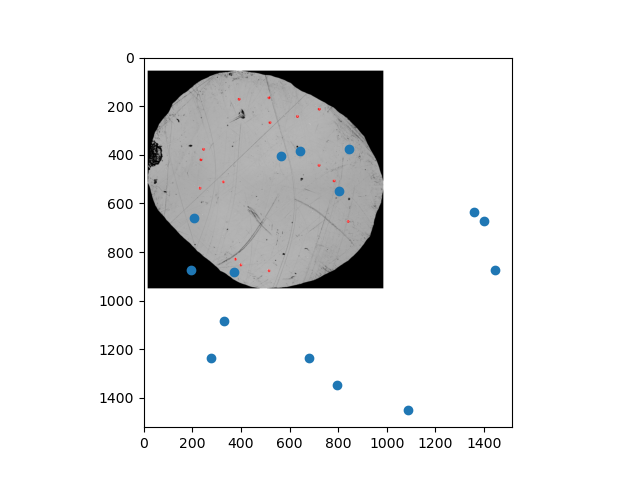

In [28]:
# initiallize the figure (blank slate for plotting)
plt.figure()

# we have to make a descision here.  let's just find points 1 and 2 when we go to the next microscope,
# and give the program those positions for alignment

# let's plot the image real quick (to make sure we're measuring 1 and 2)
img = plt.imread(path + 'puck_1_fiber_positions.png')

# this is how you put an image on the figure
plt.imshow(img)


# scatter with x and y values
# [:,0] means all rows in the 0th column (aka, the x values)
plt.scatter(positions[:,0], positions[:,1])



In [29]:
# the image has units of pixels and the scatters have units of um, so we need a conversion
# I added a line to the origional file to save the pixel sizes:
# np.savez('scales.npz', x_scale=x_scale, y_scale=y_scale, z_scale=z_scale) 

# here, we'll read the scale in
scales = np.load(path + 'scales.npz')
scales

NpzFile '/Users/austin/Desktop/Susan/Sample001/scales.npz' with keys: x_scale, y_scale, z_scale

In [34]:
x_scale = scales['x_scale']
y_scale = scales['y_scale']
z_scale = scales['z_scale']

In [ ]:
# and we don't need the image, we need


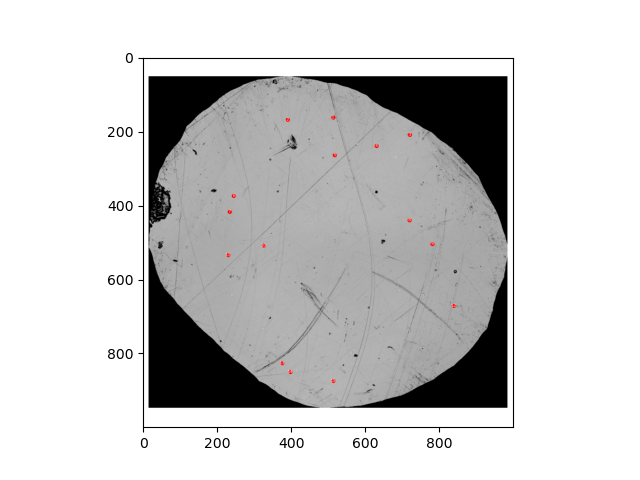

In [ ]:
plt.figure()
plt.imshow(img)


In [ ]:
# the above img is saved as a nice map but is saved with some borders around the edge.  I have saved the border free version below:

In [38]:
image = np.load(path + 'puck_1_raw_image.npz')['raw_image']

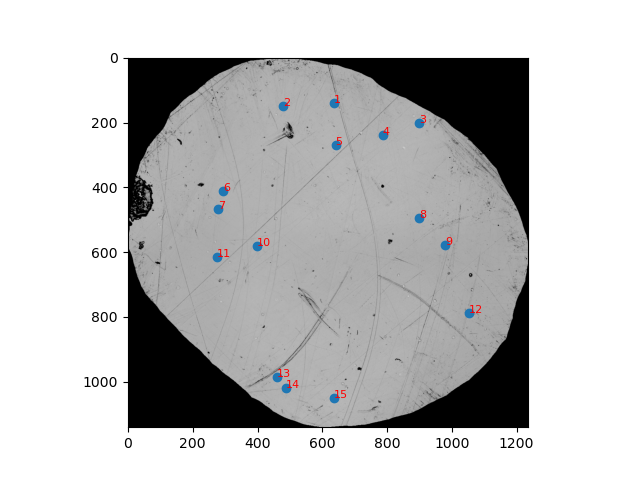

In [ ]:
labels = np.arange(1, len(positions)+1)
labels = [str(label) for label in labels]

plt.figure()
plt.imshow(image, cmap='grey')
plt.scatter(positions[:,1]/ x_scale, positions[:,0] / y_scale)

for (x, y, label) in zip(positions[:,1]/x_scale, positions[:,0]/y_scale, labels):
    plt.text(x, y, label, color='red', fontsize=8)

In [ ]:
# Anyways, now that we 